In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url='https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}


In [4]:
req=requests.get(url)
print(req)

<Response [200]>


In [5]:
req=requests.get(url,headers=headers)
print(req)

<Response [200]>


In [6]:
data=BeautifulSoup(req.content,'lxml') #data is for whole page
box=data.find('div',attrs={'class':"_1YokD2 _3Mn1Gg"}) # we data from selected section only

In [7]:
#<div class="_4rR01T">POCO X5 Pro 5G (Horizon Blue, 128 GB)</div>

In [8]:
n=box.find('div',attrs={'class':"_4rR01T"})
print(n.text)

APPLE iPhone 14 (Blue, 128 GB)


In [9]:
name=[]
for i in box.findAll('div',attrs={"class":"_4rR01T"}):
    name.append(i.text)

In [10]:
print(len(name))

24


In [11]:
final_sp,act_sp=[],[]
for i in box.findAll('div',attrs={'class':'_25b18c'}):
    if "off" in i.text:
        final_sp.append(i.text.split('₹')[1])
        act_sp.append(i.text.split('₹')[2][:-7])
    else:
        final_sp.append("0")
        act_sp.append(i.text)      

print(final_sp)
print(act_sp)
print(len(act_sp))
print(len(final_sp))

['58,999', '60,499', '13,999', '12,490', '13,999', '59,999', '12,490', '59,999', '22,999', '5,999', '17,244', '11,999', '15,999', '24,999', '6,499', '7,499', '11,999', '12,999', '12,999', '12,999', '66,999', '5,499', '11,999', '14,999']
['69,900', '69,900', '17,999', '18,490', '17,999', '69,900', '18,490', '69,900', '27,999', '9,999', '19,999', '16,999', '21,999', '29,999', '11,999', '13,999', '16,999', '18,999', '18,999', '18,999', '79,900', '9,999', '17,999', '20,999']
24
24


In [12]:
w=box.find('div',attrs={'class':'fMghEO'})
print(w)
print(w.text)
spec_idx=w.text.index('ROM')+3
spec=w.text[:spec_idx]
print("spec   ",spec)
Display=w.text[w.text.index(spec)+len(spec):w.text.index('Display')]
print(Display)
camera=w.text[w.text.index("Display")+7:w.text.index('Camera')]
print(camera)
proc=w.text[w.text.index('Camera')+6:w.text.index('Processor')+9]
print(proc)

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">128 GB ROM</li><li class="rgWa7D">15.49 cm (6.1 inch) Super Retina XDR Display</li><li class="rgWa7D">12MP + 12MP | 12MP Front Camera</li><li class="rgWa7D">A15 Bionic Chip, 6 Core Processor Processor</li><li class="rgWa7D">1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories</li></ul></div>
128 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display12MP + 12MP | 12MP Front CameraA15 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories
spec    128 GB ROM
15.49 cm (6.1 inch) Super Retina XDR 
12MP + 12MP | 12MP Front 
A15 Bionic Chip, 6 Core Processor


In [13]:
specification,display,camera,processor=[],[],[],[]
for w in box.findAll('div',attrs={'class':'fMghEO'}):
    spec_idx=w.text.index('ROM')+3
    spec=w.text[:spec_idx]
    specification.append(spec)
    dis=w.text[w.text.index(spec)+len(spec):w.text.index('Display')]
    display.append(dis)
    cam=w.text[w.text.index("Display")+7:w.text.rindex('Camera')]
    camera.append(cam)
    if 'Processor' in w.text:
        proc_start = w.text.index(cam)+len(cam)+6
        proc_end = w.text.index('Processor')+9
        proc = w.text[proc_start:proc_end]
        processor.append(proc.strip())  # Remove leading/trailing spaces
    else:
        processor.append("Unknown")   
print(len(specification),len(display),len(camera),len(processor))
#print(specification)
#print(display)
#print(camera)
#print(processor)
    

24 24 24 24


In [14]:
next_page=data.find('a',attrs={'class':'ge-49M'}).get('href')
print(next_page)
#we are incomplete link means flipkart is missing

/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1


In [15]:
comp_link='https://www.flipkart.com'+next_page
print(comp_link)
#we will add loop for getting link

https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1


###### while True:
    next_page=data.find('a',attrs={'class':'_1LKTO3'}).get('href')
    comp_link='https://www.flipkart.com'+next_page
    print(comp_link)
    url=comp_link
    req=requests.get(url)
    data=BeautifulSoup(req.content,'lxml') 

#probllem is we are geting same page n times

In [16]:
pages=int(input("Please Enter Number of Pages to be scrapped :"))

Please Enter Number of Pages to be scrapped :30


In [17]:
name=[]
final_sp,act_sp=[],[]
specification,display,camera,processor=[],[],[],[]
for i in range(2,pages+2):# as we have data 1 st page we need upto 10 page only
    url='https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i)
    req=requests.get(url)
    data=BeautifulSoup(req.content,'lxml') 
    box=data.find('div',attrs={'class':"_1YokD2 _3Mn1Gg"}) # we data from selected section only
    
    next_page=box.find('a',attrs={'class':'_1LKTO3'}).get('href')
    comp_link='https://www.flipkart.com'+next_page
    #print(comp_link)
    
    for i in box.findAll('div',attrs={"class":"_4rR01T"}):
        name.append(i.text)
    
    for i in box.findAll('div',attrs={'class':'_25b18c'}):
        if "off" in i.text:
            final_sp.append(i.text.split('₹')[1])
            act_sp.append(i.text.split('₹')[2][:-7])
        else:
            final_sp.append(i.text.split('₹')[1])
            act_sp.append(i.text.split('₹')[1])
        
    for w in box.findAll('div',attrs={'class':'fMghEO'}):
        if "ROM" in w.text:
            spec_idx=w.text.index('ROM')+3
            spec=w.text[:spec_idx]
            specification.append(spec)
            if "Display" in w.text:
                dis=w.text[w.text.index(spec)+len(spec):w.text.index('Display')]
                display.append(dis)
        else:
            specification.append("Unknown")
            display.append("Unknown")


        if 'Camera' in w.text:
            cam_start = w.text.index("Display")+7
            cam_end = w.text.rindex('Camera')
            cam = w.text[cam_start:cam_end]
            camera.append(cam.strip())  # Remove leading/trailing spaces
        else:
            camera.append("Unknown")
        if 'Processor' in w.text:
            if cam in w.text:
                proc_start = w.text.index(cam)+len(cam)+6
                proc_end = w.text.index('Processor')+9
                proc = w.text[proc_start:proc_end]
                processor.append(proc.strip())  # Remove leading/trailing spaces   
            else:
                processor.append("Unknown")
        else:
            processor.append("Unknown")

print(len(name),len(act_sp),len(final_sp)) 
print(len(specification),len(display),len(camera),len(processor))

720 720 720
720 720 720 720


In [18]:
print(name[:10])
print(act_sp[:10])
print(final_sp[:10])
print(specification[:10])
print(display[:10])
print(camera[:10])
print(processor[:10])

['MOTOROLA e13 (Aurora Green, 64 GB)', 'POCO C51 (Power Black, 64 GB)', 'APPLE iPhone 14 Plus (Starlight, 128 GB)', 'APPLE iPhone 14 (Starlight, 256 GB)', 'MOTOROLA Edge 40 Neo (Caneel Bay, 128 GB)', 'POCO C55 (Power Black, 128 GB)', 'REDMI 12 (Moonstone Silver, 128 GB)', 'POCO C55 (Forest Green, 128 GB)', 'POCO X5 Pro 5G (Horizon Blue, 128 GB)', 'REDMI 12 (Pastel Blue, 128 GB)']
['10,999', '9,999', '79,900', '79,900', '27,999', '13,999', '15,999', '13,999', '25,999', '15,999']
['6,499', '5,999', '66,999', '68,999', '22,999', '7,499', '10,999', '7,499', '17,999', '10,999']
['4 GB RAM | 64 GB ROM', '4 GB RAM | 64 GB ROM', '128 GB ROM', '256 GB ROM', '8 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM']
[' | Expandable Upto 1 TB16.51 cm (6.5 inch) HD+ ', ' | Expandable Upto 1 TB16.56 cm (6.52 inch) HD+ ', '17.02 cm (6.7 inch) Super Retina XDR ', '15.49 cm (6.1 inch) Super Retina XDR ', '16.64 

In [19]:
Product = []
Colour=[]
Brand=[]

for i in name:
    if "(" in i:
        prod=i[:i.rindex("(")]
        Product.append(prod)
        if "," in i:
            Colour.append(i[len(prod)+1:i.index(",")])
        else:
            Colour.append(i[len(prod)+1:i.rindex(")")])
        
    else:
        Product.append(i)
        Colour.append("Unknown")

print(len(Product),len(Colour))
for i in Product:
    x=i.split(" ")
    Brand.append(x[0])
len(Brand)

720 720


720

In [20]:
print(Product[:10])
print(Colour[:10])

['MOTOROLA e13 ', 'POCO C51 ', 'APPLE iPhone 14 Plus ', 'APPLE iPhone 14 ', 'MOTOROLA Edge 40 Neo ', 'POCO C55 ', 'REDMI 12 ', 'POCO C55 ', 'POCO X5 Pro 5G ', 'REDMI 12 ']
['Aurora Green', 'Power Black', 'Starlight', 'Starlight', 'Caneel Bay', 'Power Black', 'Moonstone Silver', 'Forest Green', 'Horizon Blue', 'Pastel Blue']


In [21]:
actual=[]
for i in act_sp:
    comma_index=i.rfind(',')
    if comma_index != -1 and len(i[comma_index+1:])==2:
        i=i+"9"
        actual.append(i)
    else:
        actual.append(i)
print(len(actual))
    

720


In [22]:
text=['₹',',']
actual = [int(item.replace(text[0], '').replace(text[1], '')) for item in actual]
final = [int(item.replace(text[0], '').replace(text[1], '')) for item in final_sp]

In [23]:
Ram,Rom=[],[]
for spec in specification:
    if "|" in spec:
        i=spec.split("|")
        Ram.append(i[0].replace(',','').replace("RAM","").replace("GB","").strip())
        Rom.append(i[1].replace(',','').replace("ROM","").replace("GB","").strip())       
    else:
        Ram.append(("Unknown").strip())
        Rom.append((spec).strip())  
        
print(len(Ram),len(Rom))

720 720


In [24]:
screen=[]
Screen=[]
Display=[]
for i in display:
    if "Expandable" in i:
        i=i[i.index("Upto")+9:]
    else:
        i=i
    if "(" in i:
        Screen.append(i[:i.index(')')+1].strip())
        Display.append(i[i.index(')')+1:].strip())
    else:
        Screen.append(i)
        Display.append(i)   
#print(Display)
#print(Screen)
for i in Screen:
    if "Unknown" not in i:
        while i and i[0].isalpha():
            i = i.replace(i[0], '')
        screen.append(i)
    else:
        screen.append(i)
print(len(screen),len(Display))

720 720


In [25]:
Rear_camera,Front_camera=[],[]
for i in camera:
    i=i.replace('Rear','').replace('Camera','').replace('Dual','').replace('Front','').strip()
    if "|" in i:
        cam=i.split('|')
        Rear_camera.append(cam[0].strip())
        Front_camera.append(cam[1].strip())
    else:
        Rear_camera.append(i.replace('Rear','').strip())
        Front_camera.append(str('Unknown'))
        
print(len(Rear_camera),len(Front_camera))

720 720


In [26]:
Battery,Processor=[],[]
for i in processor:
    if i == 'Unknown':
        Battery.append("Unknown")
        Processor.append("Unknown")
    else:
        if "Battery" in i:
            x=i.split("Battery")
            Battery.append(x[0].replace("Battery",'').strip())
            Processor.append(x[1].replace("Processor",'').strip())
        else:
            Battery.append("Unknown")
            Processor.append(i)
            
print(len(Battery),len(Processor))

720 720


In [27]:
flipkart=pd.DataFrame({"Mobile_Name":Product,"Brand":Brand,'Color':Colour,"RAM":Ram,"ROM":Rom,"Actual_price":actual,
                       "Selling_price":final,"Display":Display,"Length":screen,"Rear_Cam":Rear_camera,
                    "Front_cam":Front_camera,'Battery_Capacity':Battery,"Processor":Processor})
flipkart.head(5)

,Mobile_Name,Brand,Color,RAM,ROM,Actual_price,Selling_price,Display,Length,Rear_Cam,Front_cam,Battery_Capacity,Processor
0,MOTOROLA e13,MOTOROLA,Aurora Green,4,64,10999,6499,HD+,16.51 cm (6.5 inch),13MP,5MP,5000 mAh,Unisoc T606
1,POCO C51,POCO,Power Black,4,64,9999,5999,HD+,16.56 cm (6.52 inch),8MP,5MP,5000 mAh,Helio G36
2,APPLE iPhone 14 Plus,APPLE,Starlight,Unknown,128 GB ROM,79900,66999,Super Retina XDR,17.02 cm (6.7 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor"
3,APPLE iPhone 14,APPLE,Starlight,Unknown,256 GB ROM,79900,68999,Super Retina XDR,15.49 cm (6.1 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor"
4,MOTOROLA Edge 40 Neo,MOTOROLA,Caneel Bay,8,128,27999,22999,Full HD+,16.64 cm (6.55 inch),50MP + 13MP,32MP,5000 mAh,Dimensity 7030


In [57]:
flipkart = flipkart.applymap(lambda x: x.strip() if isinstance(x, str) else x)
flipkart["Brand"]=flipkart["Brand"].replace("Google","GooglePixel")
flipkart["Brand"]=flipkart["Brand"].str.title()
flipkart['RAM'] = flipkart['RAM'].str.replace(r'\d+ MB', 'less than GB', case=False, regex=True)
flipkart['ROM'] = flipkart['ROM'].str.replace(r'\d+ MB', 'less than GB', case=False, regex=True)
flipkart['ROM'] = flipkart['ROM'].str.replace('GB ROM', ' ')
flipkart["Discount in %age"]=((flipkart['Actual_price']-flipkart['Selling_price'])/flipkart['Actual_price']*100).round(2)
flipkart['Display'] = flipkart['Display'].fillna('Not Mentioned')
#case=False, it means that the replacement is case-insensitive.
#regex=True, pattern provided in the first parameter should be treated as a regular expression

In [58]:
flipkart.dtypes

Mobile_Name          object
Brand                object
Color                object
RAM                  object
ROM                  object
Actual_price          int64
Selling_price         int64
Display              object
Length               object
Rear_Cam             object
Front_cam            object
Battery_Capacity     object
Processor            object
Discount in %age    float64
dtype: object

In [76]:
flipkart.head()

,Mobile_Name,Brand,Color,RAM,ROM,Actual_price,Selling_price,Display,Length,Rear_Cam,Front_cam,Battery_Capacity,Processor,Discount in %age
0,MOTOROLA e13,Motorola,Aurora Green,4,64,10999,6499,HD+,16.51 cm (6.5 inch),13MP,5MP,5000 mAh,Unisoc T606,40.91
1,POCO C51,Poco,Power Black,4,64,9999,5999,HD+,16.56 cm (6.52 inch),8MP,5MP,5000 mAh,Helio G36,40.00
2,APPLE iPhone 14 Plus,Apple,Starlight,Unknown,128,79900,66999,Super Retina XDR,17.02 cm (6.7 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor",16.15
3,APPLE iPhone 14,Apple,Starlight,Unknown,256,79900,68999,Super Retina XDR,15.49 cm (6.1 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor",13.64
4,MOTOROLA Edge 40 Neo,Motorola,Caneel Bay,8,128,27999,22999,Full HD+,16.64 cm (6.55 inch),50MP + 13MP,32MP,5000 mAh,Dimensity 7030,17.86


In [77]:
flipkart.loc[flipkart["Brand"] == 'Apple', "RAM"].replace("Unknown", "iOS", inplace=True)

In [78]:
flipkart.to_csv("Mobile_data_flipkart.csv")

In [79]:
df=pd.read_csv("Mobile_data_flipkart.csv")
df.head()

,Unnamed: 0,Mobile_Name,Brand,Color,RAM,ROM,Actual_price,Selling_price,Display,Length,Rear_Cam,Front_cam,Battery_Capacity,Processor,Discount in %age
0,0,MOTOROLA e13,Motorola,Aurora Green,4,64,10999,6499,HD+,16.51 cm (6.5 inch),13MP,5MP,5000 mAh,Unisoc T606,40.91
1,1,POCO C51,Poco,Power Black,4,64,9999,5999,HD+,16.56 cm (6.52 inch),8MP,5MP,5000 mAh,Helio G36,40.00
2,2,APPLE iPhone 14 Plus,Apple,Starlight,Unknown,128,79900,66999,Super Retina XDR,17.02 cm (6.7 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor",16.15
3,3,APPLE iPhone 14,Apple,Starlight,Unknown,256,79900,68999,Super Retina XDR,15.49 cm (6.1 inch),12MP + 12MP,12MP,Unknown,"A15 Bionic Chip, 6 Core Processor",13.64
4,4,MOTOROLA Edge 40 Neo,Motorola,Caneel Bay,8,128,27999,22999,Full HD+,16.64 cm (6.55 inch),50MP + 13MP,32MP,5000 mAh,Dimensity 7030,17.86


In [80]:
r=df[["Actual_price","Selling_price","Mobile_Name",'Brand']].sort_values(by='Actual_price',ascending=False)
r.head()

,Actual_price,Selling_price,Mobile_Name,Brand
661,179909,176900,APPLE iPhone 15 Pro Max,Apple
535,159909,156900,APPLE iPhone 15 Pro Max,Apple
683,159909,156900,APPLE iPhone 15 Pro Max,Apple
605,159909,156900,APPLE iPhone 15 Pro Max,Apple
638,159909,156900,APPLE iPhone 15 Pro Max,Apple


In [81]:
df.shape

(720, 15)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   Mobile_Name       720 non-null    object 
 2   Brand             720 non-null    object 
 3   Color             718 non-null    object 
 4   RAM               720 non-null    object 
 5   ROM               720 non-null    object 
 6   Actual_price      720 non-null    int64  
 7   Selling_price     720 non-null    int64  
 8   Display           482 non-null    object 
 9   Length            720 non-null    object 
 10  Rear_Cam          720 non-null    object 
 11  Front_cam         720 non-null    object 
 12  Battery_Capacity  720 non-null    object 
 13  Processor         700 non-null    object 
 14  Discount in %age  720 non-null    float64
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


In [83]:
def null_values(df):
    nv = df.isnull().sum()
    nv = nv[nv > 0]
    for col in nv.index:
        if df[col].dtype == "object":
            df[col].fillna("Unknown",inplace=True)
        else:
            df[col].fillna(df[col].mean(),inplace=True)
    return nv

In [84]:
null_values(df)

Color          2
Display      238
Processor     20
dtype: int64

In [85]:
df.isnull().sum()

Unnamed: 0          0
Mobile_Name         0
Brand               0
Color               0
RAM                 0
ROM                 0
Actual_price        0
Selling_price       0
Display             0
Length              0
Rear_Cam            0
Front_cam           0
Battery_Capacity    0
Processor           0
Discount in %age    0
dtype: int64

In [86]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [87]:
#EDA

In [88]:
df.columns

Index(['Unnamed: 0', 'Mobile_Name', 'Brand', 'Color', 'RAM', 'ROM',
       'Actual_price', 'Selling_price', 'Display', 'Length', 'Rear_Cam',
       'Front_cam', 'Battery_Capacity', 'Processor', 'Discount in %age'],
      dtype='object')

In [89]:
df[['Brand']].value_counts().head(20)

Brand      
Samsung        93
Redmi          64
Realme         63
Vivo           42
Poco           41
Apple          39
Kechaoda       38
Motorola       37
Infinix        34
Itel           31
Oppo           26
Googlepixel    22
Nokia          22
Karbonn        21
Micromax       20
I              16
Tecno          15
Lava           15
Oneplus        13
Snexian        12
dtype: int64

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

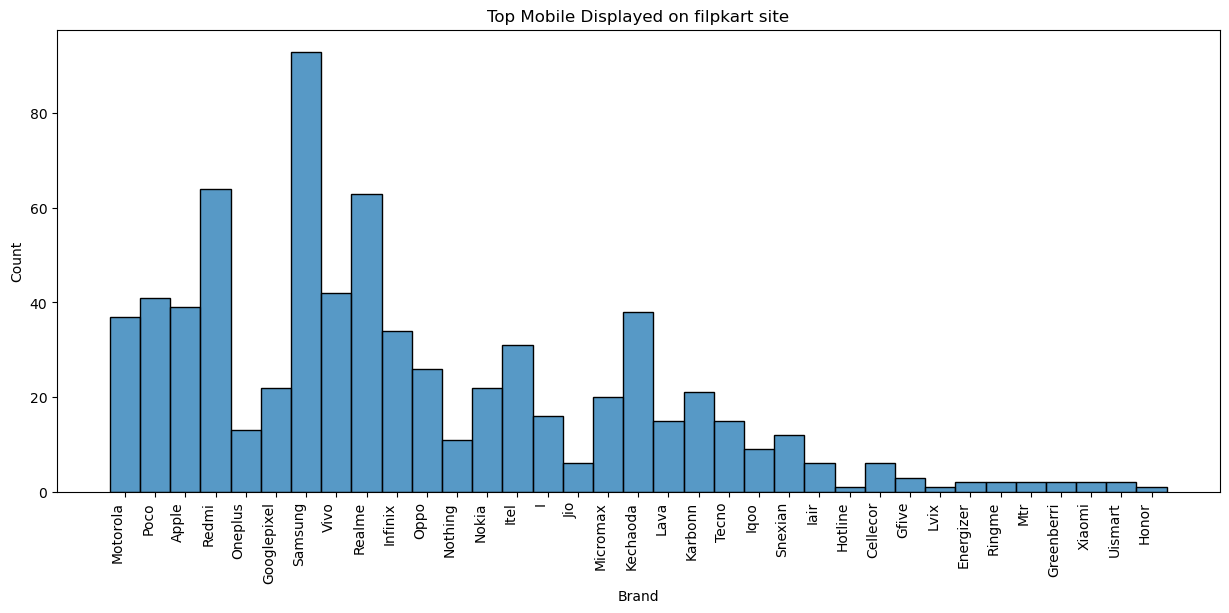

In [91]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x="Brand")
plt.xticks(rotation=90, ha='right')
plt.title("Top Mobile Displayed on filpkart site")
plt.show()

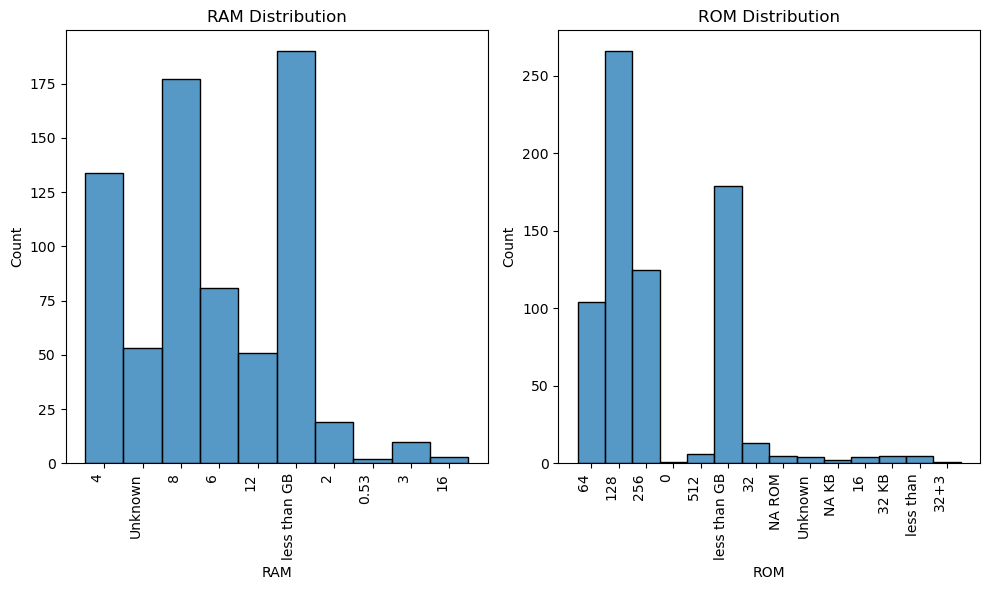

In [92]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="RAM")
plt.xticks(rotation=90, ha='right')
plt.title("RAM Distribution")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="ROM")
plt.xticks(rotation=90, ha='right')
plt.title("ROM Distribution")

plt.tight_layout() 
plt.show()

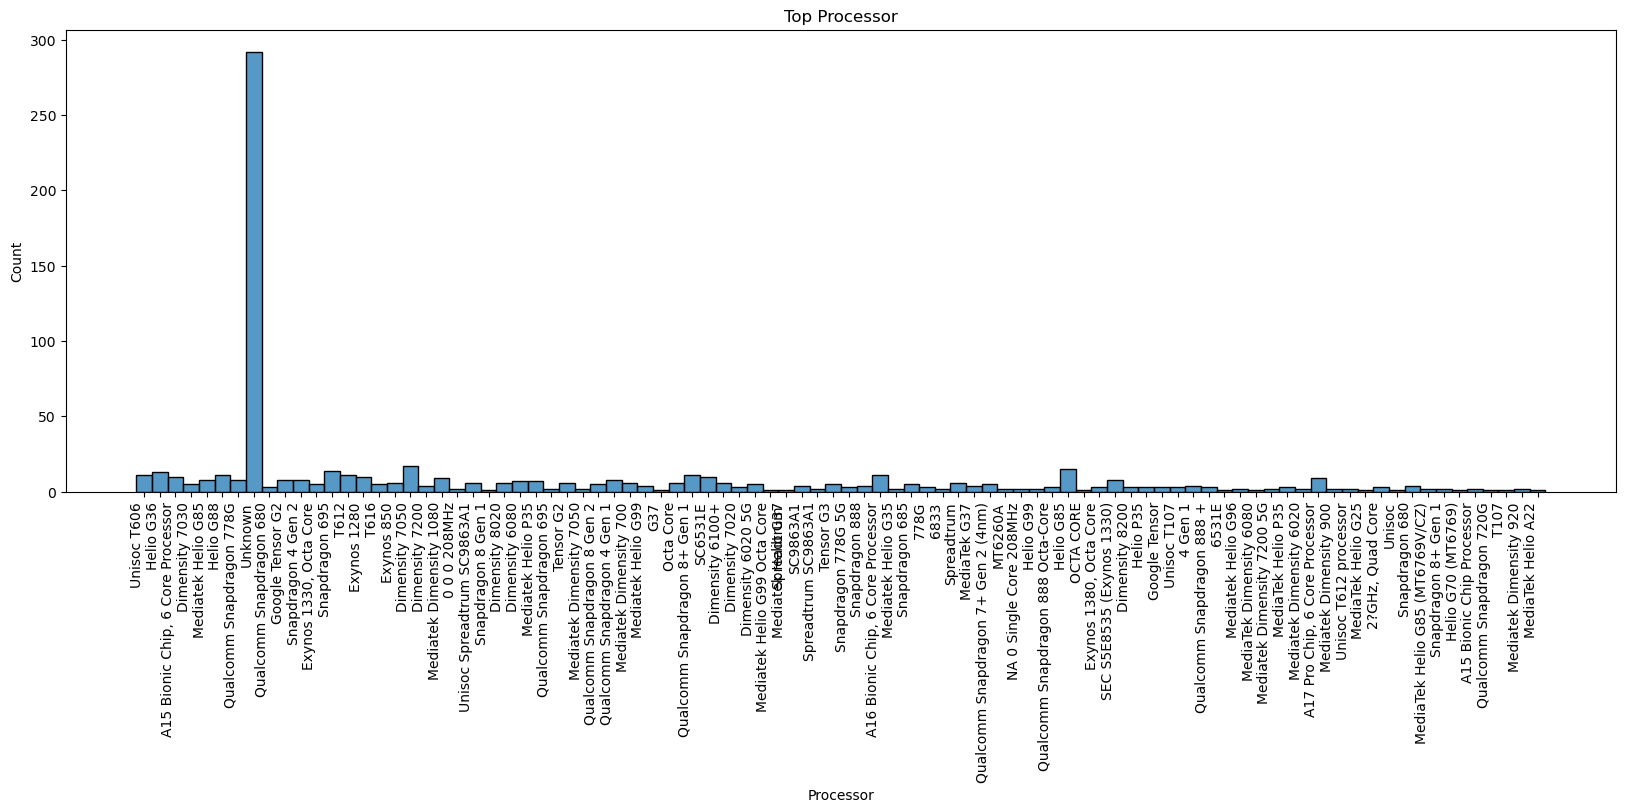

In [93]:
plt.figure(figsize=(20,6))
sns.histplot(data=df,x="Processor")
plt.xticks(rotation=90, ha='right')
plt.title("Top Processor")
plt.show()

In [94]:
df.columns

Index(['Unnamed: 0', 'Mobile_Name', 'Brand', 'Color', 'RAM', 'ROM',
       'Actual_price', 'Selling_price', 'Display', 'Length', 'Rear_Cam',
       'Front_cam', 'Battery_Capacity', 'Processor', 'Discount in %age'],
      dtype='object')

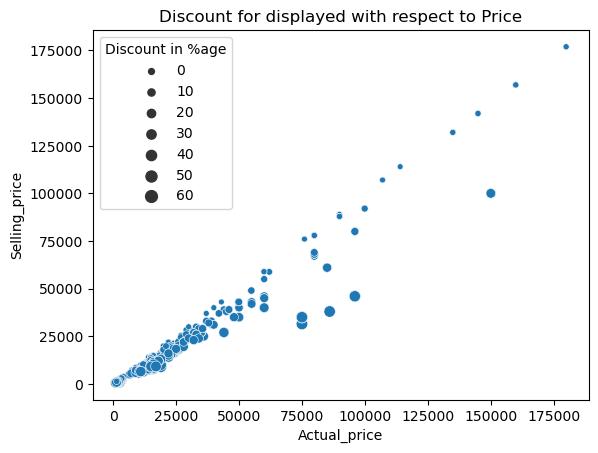

In [95]:
sns.scatterplot(data=df,x='Actual_price',y='Selling_price',size='Discount in %age')
plt.title('Discount for displayed with respect to Price')
plt.show()

In [96]:
avg_price=df.groupby("Brand")[["Actual_price","Selling_price"]].mean().reset_index()
avg_price.head()

,Brand,Actual_price,Selling_price
0,Apple,93238.641026,87971.102564
1,Cellecor,1715.666667,988.166667
2,Energizer,1099.000000,749.000000
3,Gfive,1099.000000,661.000000
4,Googlepixel,65044.227273,53544.227273


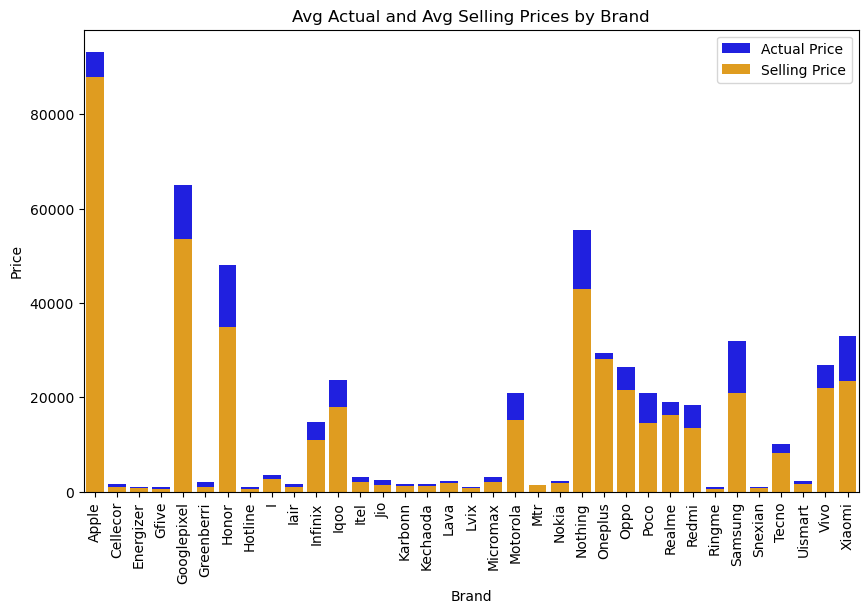

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x="Brand", y="Actual_price", label="Actual Price",color='Blue')
sns.barplot(data=avg_price, x="Brand", y="Selling_price", label="Selling Price", color='orange')

plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Avg Actual and Avg Selling Prices by Brand')
plt.legend()
plt.show()